# Title : "Restaurant Data Analysis and Insights"

# 🧩 Phase 1: Data Cleaning & Preprocessing

1 - Importing Libraries & Setting Theme

In [64]:
#-------------------
# Load Libraries 
#-------------------
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# handle warnings
warnings.filterwarnings('ignore')

#-------------------
# Setting Theme 
#-------------------

sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8, 4)


2 - Load & Inspect Dataset

In [65]:
#-------------------
# Load Dataset 
#-------------------

df = pd.read_csv("restaurant_analysis_dataset.csv")
print("✅ Dataset Loaded Successfully")

#-------------------
# Inspect Dataset 
#-------------------

print("\nFirst 5 Rows:")
display(df.head()) 

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:") 
display(df.describe(include="all"))

print("\nMissing Values:")
display(df.isnull().sum())

print("\nDuplicate Rows:")

display(df.duplicated().sum())

✅ Dataset Loaded Successfully

First 5 Rows:


,Restaurant ID,Restaurant Name,Country,City,City Code,Address,Cuisines,Average Cost for Two,Currency,Has Table Booking,Has Online Delivery,Aggregate Rating,Votes,Delivery Time (mins),Price Range
0,1077.0,BBQ Nation,UAE,New York,C485,15 Main Street,Mexican,690.0,NaN,No,NaN,4.0,2577.0,78.0,1.0
1,1231.0,BBQ Nation,India,Mumbai,C223,20 Main Street,NaN,2076.0,INR,Yes,Yes,3.8,NaN,36.0,2.0
2,1055.0,Tandoor Tales,UAE,New York,C156,124 Main Street,Thai,1808.0,USD,Yes,Yes,3.6,168.0,39.0,2.0
3,1038.0,Food Planet,USA,Dubai,NaN,14 Main Street,Continental,1936.0,GBP,No,Yes,3.8,1562.0,68.0,4.0
4,1359.0,NaN,USA,Dubai,C505,106 Main Street,North Indian,747.0,GBP,Yes,Yes,3.1,2250.0,25.0,3.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         392 non-null    float64
 1   Restaurant Name       392 non-null    object 
 2   Country               392 non-null    object 
 3   City                  391 non-null    object 
 4   City Code             392 non-null    object 
 5   Address               391 non-null    object 
 6   Cuisines              391 non-null    object 
 7   Average Cost for Two  392 non-null    float64
 8   Currency              392 non-null    object 
 9   Has Table Booking     392 non-null    object 
 10  Has Online Delivery   391 non-null    object 
 11  Aggregate Rating      391 non-null    float64
 12  Votes                 392 non-null    float64
 13  Delivery Time (mins)  390 non-null    float64
 14  Price Range           392 non-null    float64
dtypes: float

,Restaurant ID,Restaurant Name,Country,City,City Code,Address,Cuisines,Average Cost for Two,Currency,Has Table Booking,Has Online Delivery,Aggregate Rating,Votes,Delivery Time (mins),Price Range
count,392.000000,392,392,391,392,391,391,392.000000,392,392,391,391.000000,392.000000,390.000000,392.000000
unique,NaN,15,5,7,307,167,7,NaN,5,2,2,NaN,NaN,NaN,NaN
top,NaN,BBQ Nation,Australia,New York,C891,177 Main Street,Thai,NaN,INR,No,Yes,NaN,NaN,NaN,NaN
freq,NaN,38,92,68,4,7,60,NaN,85,235,278,NaN,NaN,NaN,NaN
mean,1201.862245,NaN,NaN,NaN,NaN,NaN,NaN,2088.339286,NaN,NaN,NaN,3.367519,2600.875000,56.423077,2.655612
std,114.009182,NaN,NaN,NaN,NaN,NaN,NaN,1098.458208,NaN,NaN,NaN,0.923063,1408.249701,20.191321,1.085251
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,302.000000,NaN,NaN,NaN,1.800000,17.000000,20.000000,1.000000
25%,1104.750000,NaN,NaN,NaN,NaN,NaN,NaN,1210.750000,NaN,NaN,NaN,2.700000,1400.750000,40.000000,2.000000
50%,1200.500000,NaN,NaN,NaN,NaN,NaN,NaN,1964.000000,NaN,NaN,NaN,3.400000,2779.000000,57.500000,3.000000
75%,1300.250000,NaN,NaN,NaN,NaN,NaN,NaN,3062.250000,NaN,NaN,NaN,4.150000,3711.500000,74.750000,4.000000



Missing Values:


Restaurant ID           20
Restaurant Name         20
Country                 20
City                    21
City Code               20
Address                 21
Cuisines                21
Average Cost for Two    20
Currency                20
Has Table Booking       20
Has Online Delivery     21
Aggregate Rating        21
Votes                   20
Delivery Time (mins)    22
Price Range             20
dtype: int64


Duplicate Rows:


np.int64(12)

3 - Remove Duplicates

In [66]:
#-------------------
# Remove Duplicates Rows
#-------------------
print("Shape before removing duplicates:", df.shape)

df = df.drop_duplicates()

print("✅ Duplicates removed successfully!")
print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (412, 15)
✅ Duplicates removed successfully!
Shape after removing duplicates: (400, 15)


4 - Handle missing values

In [67]:
#-------------------
# # Handle missing values properly
#-------------------

# Fill logical columns
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['City Code'] = df["City Code"].fillna("Unknown")
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0]) 
df['Address'] =  df["Address"].fillna("Not Available")

# Numeric columns 
df['Average Cost for Two'] = df['Average Cost for Two'].fillna(df['Average Cost for Two'].median()) 
df['Aggregate Rating'] = df['Aggregate Rating'].fillna(df['Aggregate Rating'].mean())
df['Votes'] = df['Votes'].fillna(0)
df['Delivery Time (mins)'] = df['Delivery Time (mins)'].fillna(df['Delivery Time (mins)'].median())
df['Price Range'] = df['Price Range'].fillna(df['Price Range'].median())

# Categorical columns
df['Currency'] = df['Currency'].fillna("Unknown") 
df['Has Online Delivery']  = df['Has Online Delivery'].fillna("No")
df['Has Table Booking']  = df['Has Table Booking'].fillna("No")

# Check again
df.isnull().sum()

Restaurant ID           20
Restaurant Name         20
Country                  0
City                     0
City Code                0
Address                  0
Cuisines                 0
Average Cost for Two     0
Currency                 0
Has Table Booking        0
Has Online Delivery      0
Aggregate Rating         0
Votes                    0
Delivery Time (mins)     0
Price Range              0
dtype: int64

# 📊 Phase 2: Exploratory Data Analysis (EDA)

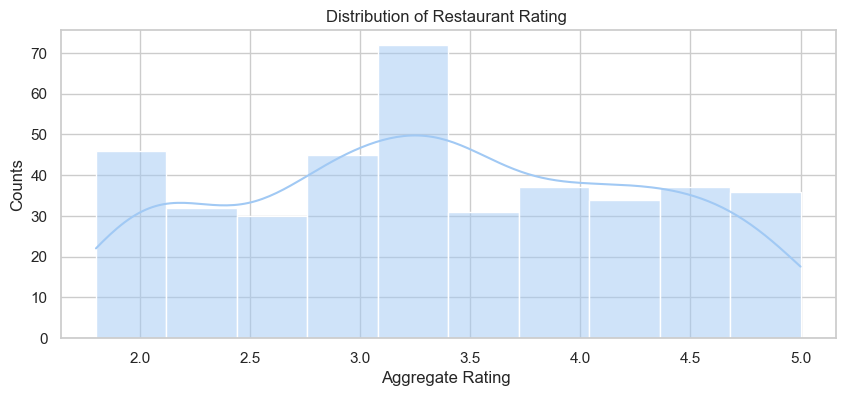

In [68]:
#-------------------
# Rating Distribution Analysis 
#-------------------

plt.figure(figsize= (10,4))
sns.histplot(df['Aggregate Rating'], kde=True , bins=10 )
plt.title("Distribution of Restaurant Rating ")
plt.xlabel("Aggregate Rating ")
plt.ylabel("Counts")
plt.show()

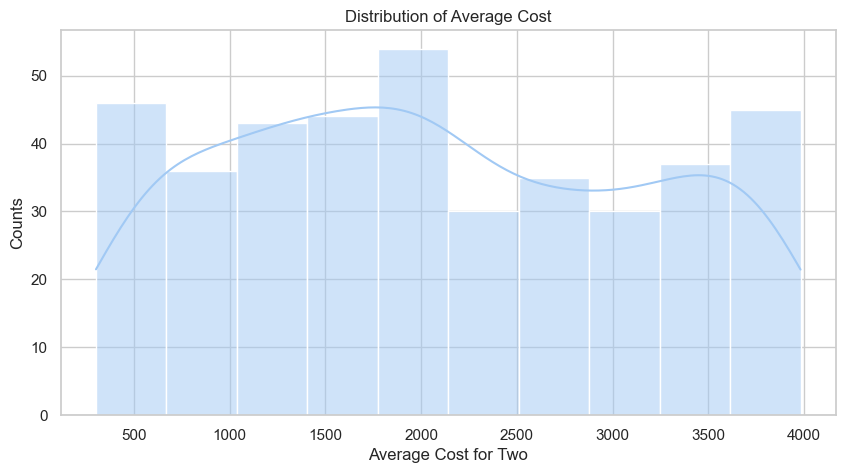

In [69]:
#-------------------
# Average Cost for Two Analysis 
#-------------------

plt.figure(figsize= (10,5))
sns.histplot(df['Average Cost for Two'] , kde= True , bins= 10)
plt.title("Distribution of Average Cost")
plt.xlabel("Average Cost for Two")
plt.ylabel("Counts")
plt.show()

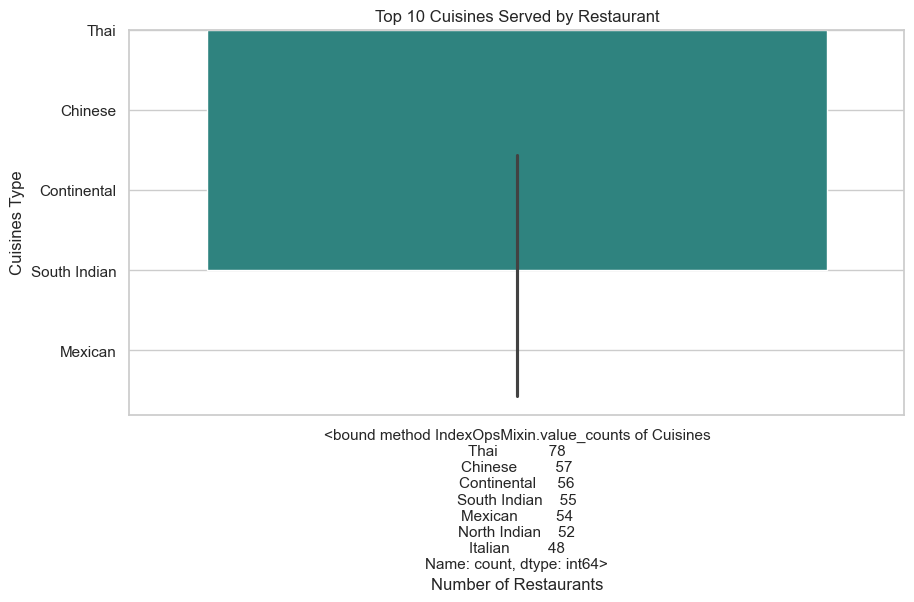

In [70]:
#-------------------
# Top 10 Cuisines by Count
#-------------------

top_cuisines = df['Cuisines'].value_counts().head(10)

plt.figure(figsize= (10,5))
sns.barplot(x = top_cuisines.value_counts , y = top_cuisines.index , palette="viridis")
plt.title("Top 10 Cuisines Served by Restaurant")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines Type")
plt.show()

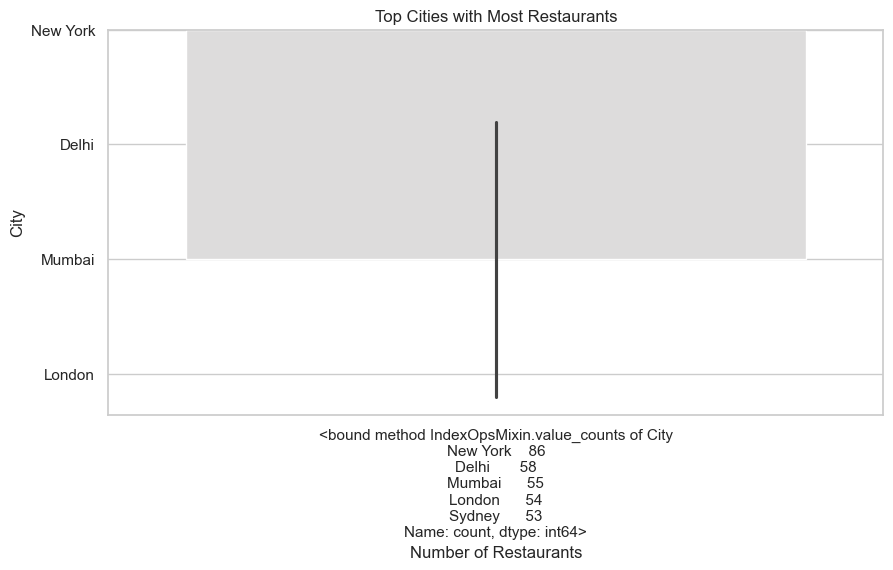

In [71]:
#-------------------
# City-wise Restaurant Count
#-------------------
top_cities = df['City'].value_counts().head()
top_cities

plt.figure(figsize=(10,5))
sns.barplot(x = top_cities.value_counts , y= top_cities.index, palette="coolwarm" )
plt.title("Top Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

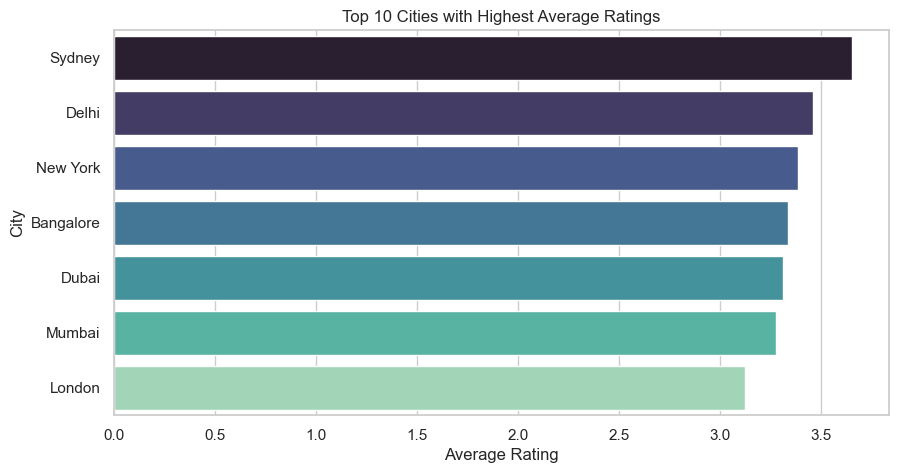

In [72]:
#-------------------
# Average Rating by City
#-------------------

avg_rating_city = df.groupby("City")['Aggregate Rating'].mean().sort_values(ascending= False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette="mako")
plt.title("Top 10 Cities with Highest Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()


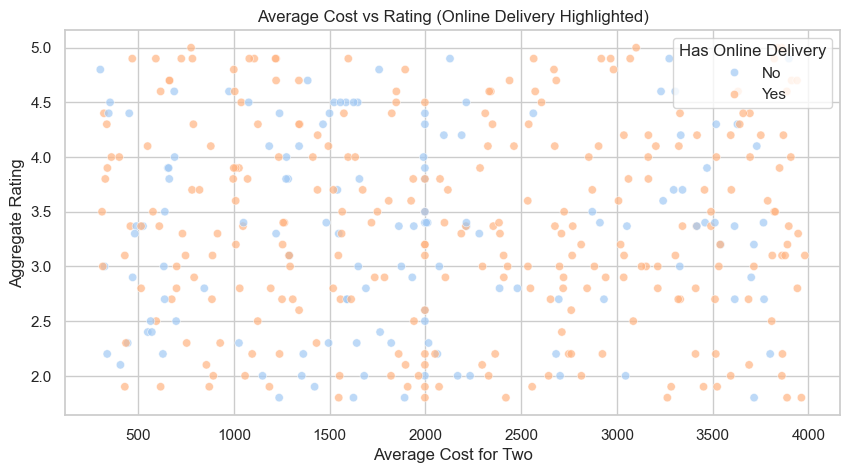

In [73]:
#-------------------
# Average Cost for Two vs Rating
#-------------------

plt.figure(figsize=(10,5))
sns.scatterplot(data=df , x = df['Average Cost for Two'] , y = df['Aggregate Rating'] , hue= df['Has Online Delivery'] , alpha=0.7)
plt.title("Average Cost vs Rating (Online Delivery Highlighted)")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.show()

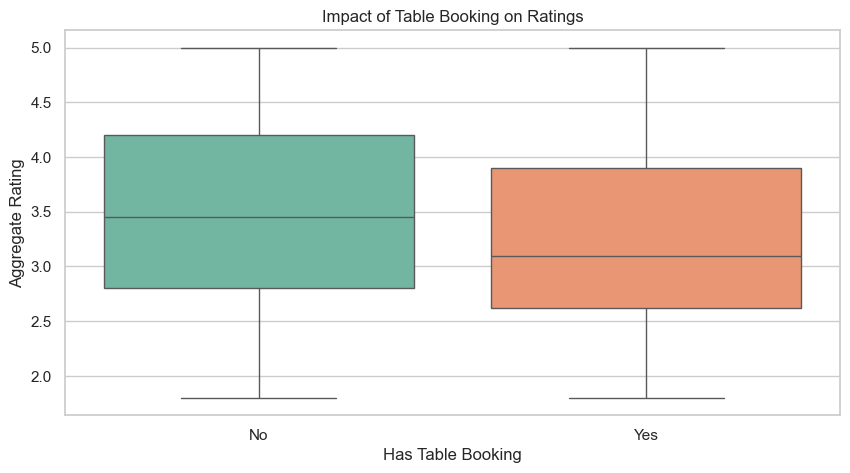

In [74]:
#-------------------
# Table Booking Impact on Ratings
#-------------------

plt.figure(figsize= (10,5))
sns.boxplot(data= df , x= df['Has Table Booking'] , y= df['Aggregate Rating'] , palette="Set2")
plt.title("Impact of Table Booking on Ratings")
plt.xlabel("Has Table Booking")
plt.ylabel("Aggregate Rating")
plt.show()

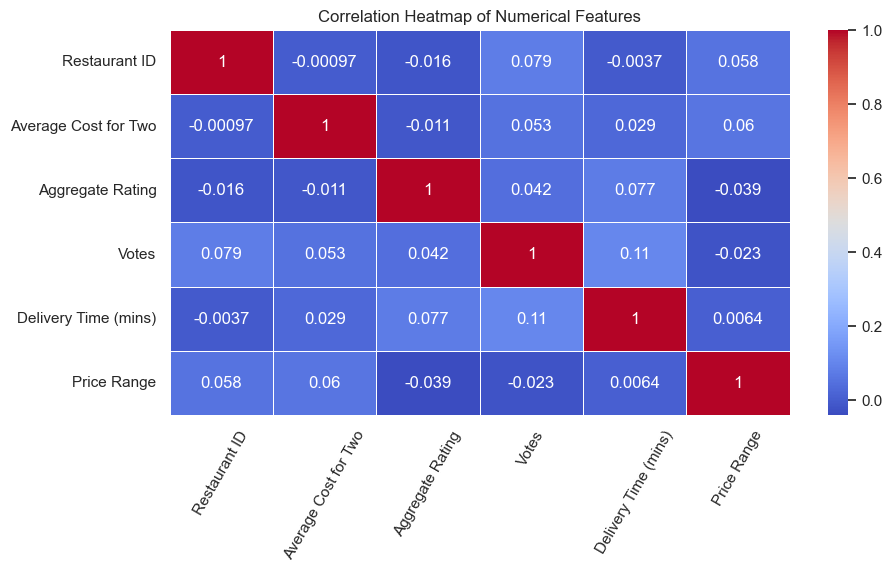

In [75]:
#-------------------
# Correlation Heatmap (Numeric Columns Only)
#-------------------

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True) , annot= True , cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tick_params(axis='x', rotation=60)
plt.show()

** Make a copy & save dataset for POWER BI Dashboard. **


In [76]:
# --------------------------------------------
# Copy & Save Dataset for POWER BI Dashboard
# --------------------------------------------
viz_df = df.copy()
viz_df.to_csv("restaurant_dashboard_dataset.csv", index=False)
viz_df.head()

,Restaurant ID,Restaurant Name,Country,City,City Code,Address,Cuisines,Average Cost for Two,Currency,Has Table Booking,Has Online Delivery,Aggregate Rating,Votes,Delivery Time (mins),Price Range
0,1077.0,BBQ Nation,UAE,New York,C485,15 Main Street,Mexican,690.0,Unknown,No,No,4.0,2577.0,78.0,1.0
1,1231.0,BBQ Nation,India,Mumbai,C223,20 Main Street,Thai,2076.0,INR,Yes,Yes,3.8,0.0,36.0,2.0
2,1055.0,Tandoor Tales,UAE,New York,C156,124 Main Street,Thai,1808.0,USD,Yes,Yes,3.6,168.0,39.0,2.0
3,1038.0,Food Planet,USA,Dubai,Unknown,14 Main Street,Continental,1936.0,GBP,No,Yes,3.8,1562.0,68.0,4.0
4,1359.0,NaN,USA,Dubai,C505,106 Main Street,North Indian,747.0,GBP,Yes,Yes,3.1,2250.0,25.0,3.0


In [77]:
# --------------------------------------------
# identify the unique value in columns for Model
# --------------------------------------------
uni_val_col =  ['Country', 'City' , 'Cuisines', 'Has Online Delivery', 'Has Table Booking']
for col in uni_val_col: 
    print(viz_df[col].unique())

['UAE' 'India' 'USA' 'Australia' 'UK']
['New York' 'Mumbai' 'Dubai' 'Sydney' 'Bangalore' 'London' 'Delhi']
['Mexican' 'Thai' 'Continental' 'North Indian' 'Chinese' 'Italian'
 'South Indian']
['No' 'Yes']
['No' 'Yes']


# --------------------------------------------
# Feature Engineering & Model Building
# --------------------------------------------

In [78]:
# ---------------------------------------------
# Encode Categorical Columns
# ---------------------------------------------

label_col = ['Country', 'City' , 'Cuisines', 'Has Online Delivery', 'Has Table Booking']
le = LabelEncoder()
for col in label_col:
    df[col] = le.fit_transform(df[col])


# ---------------------------------------------
# Select Features and Target
# ---------------------------------------------
X = df[['Average Cost for Two', 'Votes', 'Price Range', 'Has Table Booking', 'Has Online Delivery', 'City', 'Cuisines']]
y = df['Aggregate Rating']

# ---------------------------------------------
# Split Data into Train and Test
# ---------------------------------------------

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.20 , random_state=42)

scalar = StandardScaler()
X_train_scaled =  scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

# ---------------------------------------------
# Train Model
# ---------------------------------------------

# Linear Regression 
lr = LinearRegression()
lr.fit(X_train_scaled , y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
y_pred_rf = rf.predict(X_test)

# ---------------------------------------------
# Evaluate Model Performance
# ---------------------------------------------

def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print("-" * 30)

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Performance:
R² Score: 0.048
MAE: 0.773
RMSE: 0.919
------------------------------
Random Forest Performance:
R² Score: -0.072
MAE: 0.832
RMSE: 0.976
------------------------------
